In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Create a set of random latitude and longitude combinations 

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list. 

coordinates = list(lat_lngs)

In [12]:
from citipy import citipy

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [14]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [16]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | bonthe
Processing Record 3 of Set 1 | rovaniemi
Processing Record 4 of Set 1 | trincomalee
Processing Record 5 of Set 1 | upata
Processing Record 6 of Set 1 | mount isa
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | winslow
Processing Record 9 of Set 1 | lagoa
Processing Record 10 of Set 1 | znamenskoye
Processing Record 11 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | lampazos de naranjo
Processing Record 14 of Set 1 | norman wells
Processing Record 15 of Set 1 | ostrovnoy
Processing Record 16 of Set 1 | olden
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | ghanzi
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | acapulco
Proc

Processing Record 39 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 40 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 41 of Set 4 | biak
Processing Record 42 of Set 4 | maniitsoq
Processing Record 43 of Set 4 | chernyshevskiy
Processing Record 44 of Set 4 | santiago
Processing Record 45 of Set 4 | alamos
Processing Record 46 of Set 4 | ukiah
Processing Record 47 of Set 4 | ribeira grande
Processing Record 48 of Set 4 | bargal
City not found. Skipping...
Processing Record 49 of Set 4 | itarema
Processing Record 50 of Set 4 | olafsvik
Processing Record 1 of Set 5 | bulgan
Processing Record 2 of Set 5 | codrington
Processing Record 3 of Set 5 | suihua
Processing Record 4 of Set 5 | konstantinovka
Processing Record 5 of Set 5 | muli
Processing Record 6 of Set 5 | chokurdakh
Processing Record 7 of Set 5 | tateyama
Processing Record 8 of Set 5 | komsomolskiy
Processing Record 9 of Set 5 | coulihaut
City not found. Skipping...
Processing Record 10

Processing Record 24 of Set 8 | kawalu
Processing Record 25 of Set 8 | sao joao da barra
Processing Record 26 of Set 8 | corsicana
Processing Record 27 of Set 8 | reinosa
Processing Record 28 of Set 8 | laguna
Processing Record 29 of Set 8 | cap malheureux
Processing Record 30 of Set 8 | pisco
Processing Record 31 of Set 8 | namtsy
Processing Record 32 of Set 8 | bagdarin
Processing Record 33 of Set 8 | sobolevo
Processing Record 34 of Set 8 | tagusao
Processing Record 35 of Set 8 | noumea
Processing Record 36 of Set 8 | sao raimundo nonato
Processing Record 37 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 38 of Set 8 | shimoda
Processing Record 39 of Set 8 | isla mujeres
Processing Record 40 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 41 of Set 8 | vermillion
Processing Record 42 of Set 8 | ornskoldsvik
Processing Record 43 of Set 8 | zarand
Processing Record 44 of Set 8 | la asuncion
Processing Record 45 of Set 8 | dajal
Proces

Processing Record 13 of Set 12 | iskitim
Processing Record 14 of Set 12 | margate
Processing Record 15 of Set 12 | halalo
City not found. Skipping...
Processing Record 16 of Set 12 | faya
Processing Record 17 of Set 12 | carson city
Processing Record 18 of Set 12 | abu zabad
Processing Record 19 of Set 12 | monrovia
Processing Record 20 of Set 12 | shancheng
Processing Record 21 of Set 12 | hirara
Processing Record 22 of Set 12 | tapes
Processing Record 23 of Set 12 | mier
Processing Record 24 of Set 12 | oneonta
Processing Record 25 of Set 12 | laishevo
Processing Record 26 of Set 12 | san cristobal
Processing Record 27 of Set 12 | boende
Processing Record 28 of Set 12 | kiunga
Processing Record 29 of Set 12 | muros
Processing Record 30 of Set 12 | gornopravdinsk
Processing Record 31 of Set 12 | bukachacha
Processing Record 32 of Set 12 | basoko
Processing Record 33 of Set 12 | kolpashevo
Processing Record 34 of Set 12 | grindavik
Processing Record 35 of Set 12 | sao domingos
Processi

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.6971,-53.4616,71.35,65,10,11.65,UY,2022-04-19 19:53:07
1,Bonthe,7.5264,-12.5050,80.83,81,99,7.29,SL,2022-04-19 19:53:07
2,Rovaniemi,66.5000,25.7167,49.41,61,0,6.91,FI,2022-04-19 19:53:07
3,Trincomalee,8.5711,81.2335,80.94,82,52,5.21,LK,2022-04-19 19:53:08
4,Upata,8.0086,-62.3989,95.32,27,63,6.71,VE,2022-04-19 19:53:08
5,Mount Isa,-20.7333,139.5000,71.37,24,51,11.50,AU,2022-04-19 19:53:09
6,New Norfolk,-42.7826,147.0587,56.88,76,96,2.39,AU,2022-04-19 19:53:09
7,Winslow,35.0242,-110.6974,78.98,8,0,25.32,US,2022-04-19 19:52:55
8,Lagoa,39.0500,-27.9833,59.47,73,93,11.45,PT,2022-04-19 19:53:10
9,Znamenskoye,57.1281,73.8282,39.52,94,100,2.80,RU,2022-04-19 19:53:10


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2022-04-19 19:53:07,-33.6971,-53.4616,71.35,65,10,11.65
1,Bonthe,SL,2022-04-19 19:53:07,7.5264,-12.5050,80.83,81,99,7.29
2,Rovaniemi,FI,2022-04-19 19:53:07,66.5000,25.7167,49.41,61,0,6.91
3,Trincomalee,LK,2022-04-19 19:53:08,8.5711,81.2335,80.94,82,52,5.21
4,Upata,VE,2022-04-19 19:53:08,8.0086,-62.3989,95.32,27,63,6.71
5,Mount Isa,AU,2022-04-19 19:53:09,-20.7333,139.5000,71.37,24,51,11.50
6,New Norfolk,AU,2022-04-19 19:53:09,-42.7826,147.0587,56.88,76,96,2.39
7,Winslow,US,2022-04-19 19:52:55,35.0242,-110.6974,78.98,8,0,25.32
8,Lagoa,PT,2022-04-19 19:53:10,39.0500,-27.9833,59.47,73,93,11.45
9,Znamenskoye,RU,2022-04-19 19:53:10,57.1281,73.8282,39.52,94,100,2.80


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

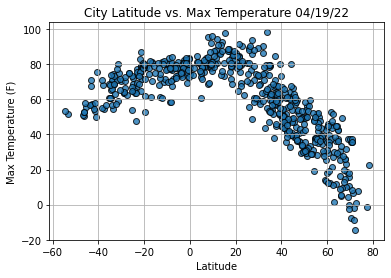

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

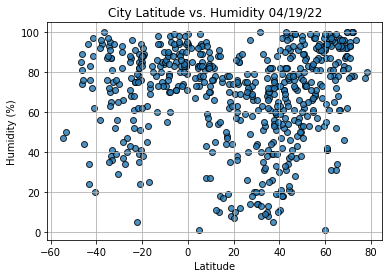

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

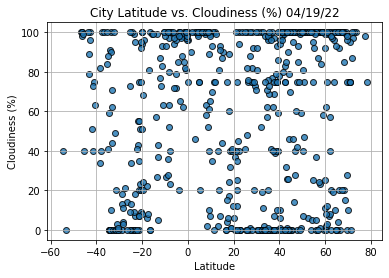

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

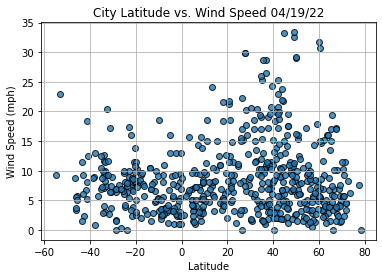

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()